In [1]:
import numpy as np
import matplotlib.pyplot as plt
import librosa
import librosa.display
import IPython.display
import scipy.signal as sg

In [2]:
def plotTimeFreq(sig,sr,title,winSize,specType,fig):

    # Adjust the x-axis to represent time
    time=np.arange(0,sig.shape[0])/sr
    
    # Scale the y-axis to represent amplitude from -1 to 1
    excursion=max(abs(sig))
    sigNew = sig / excursion
    
    # Label the x and y axes with variables
    xlabel = 'Time (seconds)'
    ylabel = 'Amplitude'

    # Create a new figure (using the figure number passed in as an argument)
    plt.figure(fig)
    
    # Create the first subplot
    plt.subplot(2,1,1)
    
    # Plot the time-domain representation of the inputted audio signal  
    plt.plot(time,sigNew)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    
    # Create the second subplot
    plt.subplot(2,1,2)
    
    # Plot the frequency-domain representatio of the inputted audio signal
    spec = librosa.amplitude_to_db(np.abs(librosa.stft(sig,n_fft=winSize)), ref=np.max)
    librosa.display.specshow(spec, y_axis=specType)
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.show

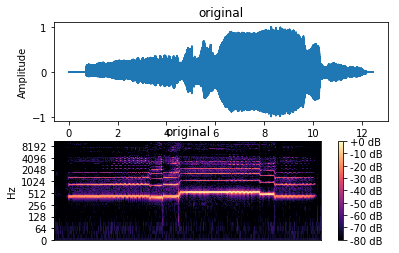

In [3]:
#load and plot audio
sig , sr = librosa.load('avm.wav')
title='original'
winSize = 1024
specType = 'log'
fig = 1
plotTimeFreq(sig,sr,title,winSize,specType,fig)
IPython.display.Audio(data=sig, rate=sr)

## Low-pass filter (filter order 1)

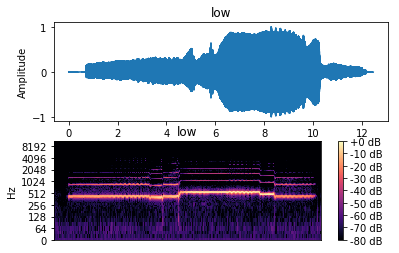

In [4]:
import librosa
import scipy.signal as sg

# order 1 has a rolloff of −6 dB per octave
# order 2 has a rolloff of −12 dB per octave
# order 3 has a rolloff of -18 dB per octave
# order 4 has a rolloff of −24 dB per octave

# set parameters
sig , sr = librosa.load('avm.wav')
order = 1
filterFreq = 400 / (sr / 2) # convert frequency to between 0 and 1
filtType = 'low'
fig = 1

# design filter
b, a = sg.butter(order, filterFreq, filtType)

# run filter on signal
sig_fil1a = sg.filtfilt(b, a, sig)

plotTimeFreq(sig_fil1a,sr,filtType,winSize,specType,fig)
IPython.display.Audio(data=sig_fil1a, rate=sr)

## Low-pass filter (filter order 4)

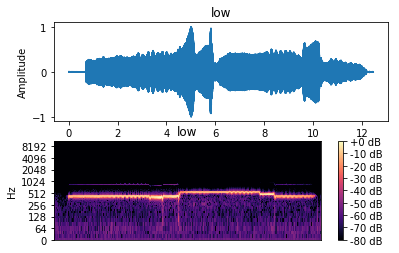

In [5]:
# order 1 has a rolloff of −6 dB per octave
# order 2 has a rolloff of −12 dB per octave
# order 3 has a rolloff of -18 dB per octave
# order 4 has a rolloff of −24 dB per octave

order = 4
filterFreq = 400 / (sr / 2) # convert frequency to between 0 and 1
filtType = 'low'
fig = 1

b, a = sg.butter(order, filterFreq, filtType)
sig_fil1b = sg.filtfilt(b, a, sig)

plotTimeFreq(sig_fil1b,sr,filtType,winSize,specType,fig)
IPython.display.Audio(data=sig_fil1b, rate=sr)

## High-pass filter

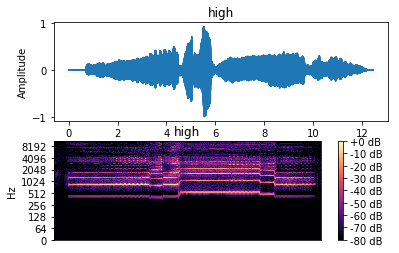

In [6]:
order = 4
filterFreq = 800 / (sr / 2) # convert frequency to between 0 and 1
filtType = 'high'
fig = 1

b, a = sg.butter(order, filterFreq, filtType)
sig_fil2 = sg.filtfilt(b, a, sig)

plotTimeFreq(sig_fil2,sr,filtType,winSize,specType,fig)
IPython.display.Audio(data=sig_fil2, rate=sr)

## Band-pass filter

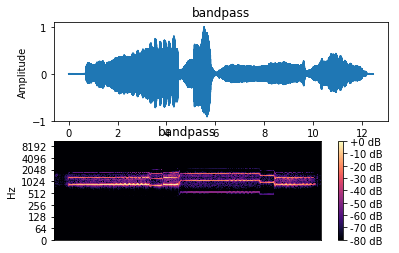

In [7]:
order = 4
filterFreq = [800 / (sr / 2), 1600 / (sr / 2)] # convert frequency to between 0 and 1
filtType = 'bandpass'
fig = 1

b, a = sg.butter(order, filterFreq, filtType)
sig_fil3 = sg.filtfilt(b, a, sig)

plotTimeFreq(sig_fil3,sr,filtType,winSize,specType,fig)
IPython.display.Audio(data=sig_fil3, rate=sr)

## Band-stop filter

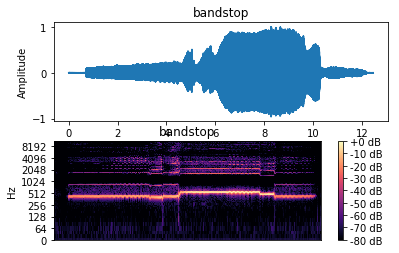

In [8]:
order = 4
filterFreq = [800 / (sr / 2), 1600 / (sr / 2)] # convert frequency to between 0 and 1
filtType = 'bandstop'
fig = 1

b, a = sg.butter(order, filterFreq, filtType)
sig_fil4 = sg.filtfilt(b, a, sig)

plotTimeFreq(sig_fil4,sr,filtType,winSize,specType,fig)
IPython.display.Audio(data=sig_fil4, rate=sr)